In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import to_datetime, get_Data
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.linear_model import HuberRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Implementation to predicts the returns of the stocks

In [37]:
newGlob = get_Data()

In [38]:
data_size = pd.read_csv("./data/1.csv",index_col=0)
dates = data_size.index
stocks = data_size.columns

In [39]:
newGlob.head()

,size,Returns,Date,valueAnnual,piotroski,debtIssue,shareIssue,assetGrowth,assetTurnover,divYld,...,idioVol,beta,seasonality,indRelativeReversal,indMomRev,compositeIssuance,price,firmAge,shareVol,benchmarkWeight
2595708,-0.361507,0.024199,946594800.0,-0.034591,0.414847,-0.259557,0.228601,0.288913,0.190722,0.092133,...,0.367203,0.280911,-0.441650,0.348790,0.359155,-0.380734,0.314050,0.262626,-0.332990,0.002936
2595708,-0.361507,-0.043422,949273200.0,-0.034591,0.401302,-0.259557,0.228601,0.288913,0.190722,0.092133,...,0.337022,0.276573,0.069416,-0.292339,-0.029175,-0.225400,0.299172,0.262626,-0.335052,0.002936
2595708,-0.361507,-0.052159,951778800.0,-0.034591,0.483766,-0.259557,0.228601,0.288913,0.190722,0.092133,...,0.230382,0.251082,0.061368,0.171371,0.299799,-0.338269,0.280538,0.262626,-0.308247,0.002751
2595708,-0.361507,0.004252,954453600.0,-0.034591,0.383369,-0.260040,0.228601,0.288913,0.190722,0.092133,...,0.309237,0.242424,-0.176707,0.421529,0.441767,-0.365909,0.235537,0.263105,-0.275720,0.002537
2595708,-0.361507,-0.021877,957045600.0,-0.034591,0.384199,-0.261000,0.228601,0.288913,0.191358,0.092133,...,0.312000,0.249460,0.296000,0.217435,0.336000,-0.321267,0.222222,0.264056,-0.239754,0.002560


In [40]:
# Specific dates used to split the data
deb = to_datetime("1999-12-31")
trainDat = to_datetime("2012-12-31") #2021-12-31"
valDat = to_datetime("2014-12-31")#2021-12-31

In [41]:
# The training sample, containing all the data for the months in between deb and trainDat: 

X_train = newGlob[(newGlob["Date"] >= deb) & (newGlob["Date"] <= trainDat)]
Y_train = X_train["Returns"]

X_val = newGlob[(newGlob["Date"] > trainDat) & (newGlob["Date"] <= valDat)]
Y_val = X_val["Returns"]

# Creating the testing data set 
X_test = newGlob[(newGlob["Date"] > valDat)]
X_sorted = newGlob[(newGlob["Date"] > valDat)]
Y_test = X_test["Returns"]

# Droping the columns "Dates" and "Returns" from the X_train database
X_train = X_train.drop(columns= ["Date", "Returns"])
X_train_norm = pd.DataFrame(StandardScaler().fit_transform(X_train))

X_val = X_val.drop(columns= ["Date", "Returns"])
X_val_norm = pd.DataFrame(StandardScaler().fit_transform(X_val))

X_test = X_test.drop(columns= ["Date", "Returns"])
X_test_norm = pd.DataFrame(StandardScaler().fit_transform(X_test))

X_sorted = X_sorted.sort_values(by=["size"], ascending = False)
X_top = X_sorted.iloc[0:1000, :]
Y_top = X_top["Returns"]
X_top = X_top.drop(columns = ["Date", "Returns"])
X_top_norm = pd.DataFrame(StandardScaler().fit_transform(X_top))

X_sorted = X_sorted.sort_values(by=["size"], ascending = True)
X_bottom = X_sorted.iloc[0:1000, :]
Y_bottom = X_bottom["Returns"]
X_bottom = X_bottom.drop(columns = ["Date", "Returns"])
X_bottom_norm = pd.DataFrame(StandardScaler().fit_transform(X_bottom))



In [42]:
Model = []
R2 = []
Position = []
Model_name = []

### Classic linear regression models

#### Linear model with square loss

In [43]:
# Linear regression model
L2_regressor = LinearRegression()
L2_regressor.fit(X_train, Y_train)

LinearRegression()

In [44]:
# model evaluation for training set
Y_train_predict = L2_regressor.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('Linear with L2 norm R2 score for training is ' + str(r2))

# Model evaluation for the testing set
cl2_Y_test_predict = L2_regressor.predict(X_test)
r2 = r2_score(Y_test, cl2_Y_test_predict)
print('Linear with L2 norm R2 score for testing is ' + str(r2))
''' Model.append("Classic Regression")
R2.append(r2)
Position.append("All") '''

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = L2_regressor.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('Linear with L2 norm R2 score for the top testing is ' + str(r2))
''' Model.append("Classic Regression")
R2.append(r2)
Position.append("Top") '''

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = L2_regressor.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('Linear with L2 norm R2 score for the bottom testing is ' + str(r2))
''' Model.append("Classic Regression")
R2.append(r2)
Position.append("Bottom") '''
Model_name.append("L2_regressor")


Linear with L2 norm R2 score for training is 0.3661602728440059
Linear with L2 norm R2 score for testing is 0.2749783258661763
Linear with L2 norm R2 score for the top testing is 0.11459374585315796
Linear with L2 norm R2 score for the bottom testing is 0.12428724225047771


FileNotFoundError: [Errno 2] No such file or directory: 'Img/scater_Classic_L2.pdf'

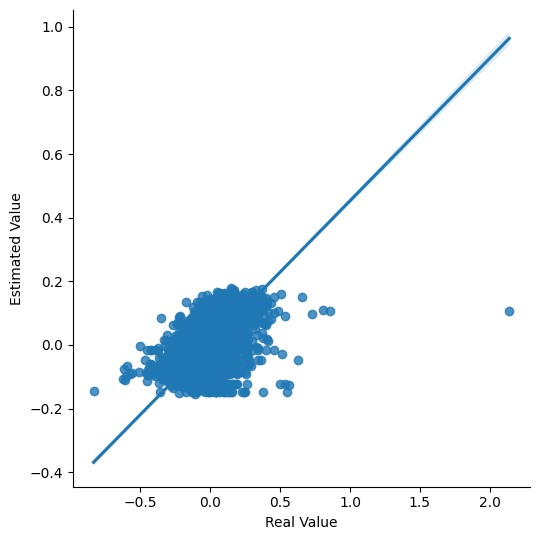

In [ ]:
cl2_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": cl2_Y_test_predict})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=cl2_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_Classic_L2.pdf")
plt.show()

In [46]:
D = {"Coefficient" : L2_regressor.coef_, "Feature": X_train.columns}
Coefs = pd.DataFrame(D)
# We are trying to get instead the absolute value of the coefficients since a feature might be negatively correlated from the return 
Coefs["Coefficient"] = Coefs["Coefficient"].apply(lambda x: abs(x))
Coefs = Coefs.sort_values(by=['Coefficient'],ascending = False)
Coefs["Model"] = "Classic Regression"
Coefs

,Coefficient,Feature,Model
39,0.368362,benchmarkWeight,Classic Regression
33,0.207310,indRelativeReversal,Classic Regression
19,0.080249,indMom,Classic Regression
18,0.037480,mom6,Classic Regression
0,0.019083,size,Classic Regression
36,0.015500,price,Classic Regression
14,0.013463,leverage,Classic Regression
30,0.011453,idioVol,Classic Regression
21,0.010421,mom12,Classic Regression
7,0.009918,divYld,Classic Regression


FileNotFoundError: [Errno 2] No such file or directory: 'Img/coef_class_regreg.pdf'

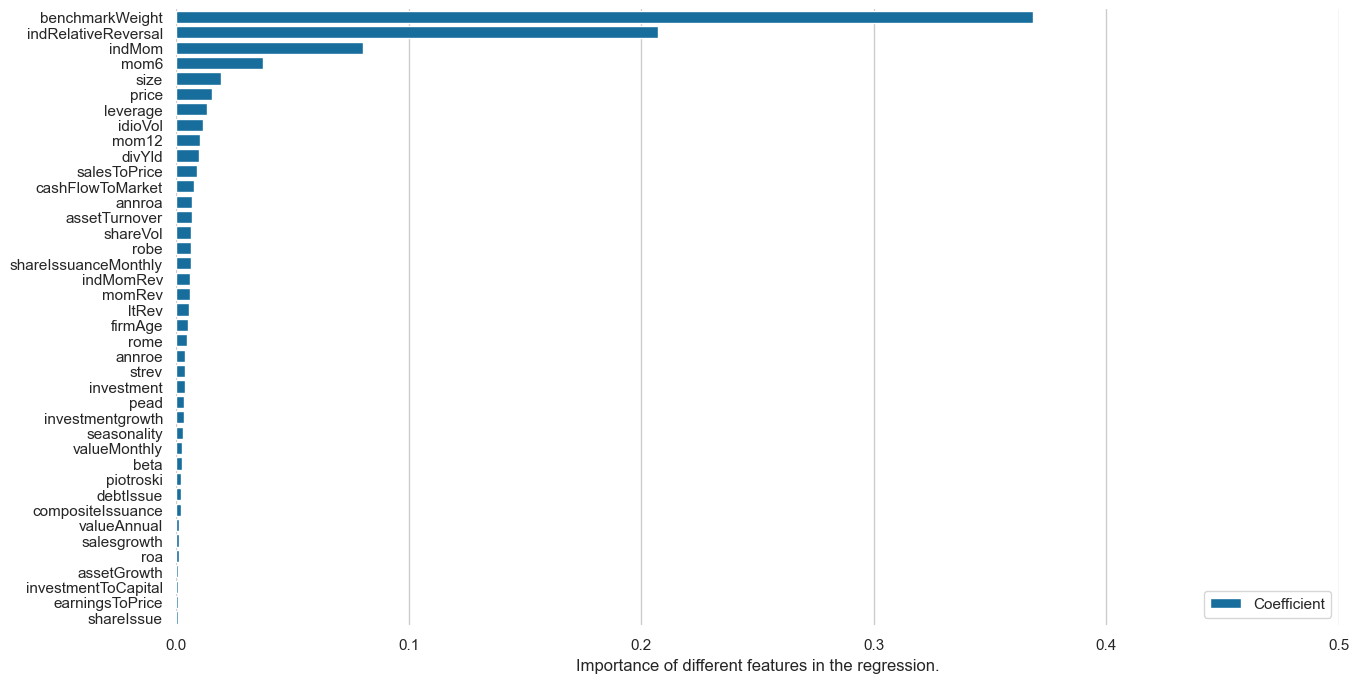

In [ ]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Plot the total crashes
sns.set_color_codes("colorblind")
sns.barplot(x="Coefficient", y="Feature", label = "Coefficient", data=Coefs,color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.5), ylabel="",
       xlabel="Importance of different features in the regression.")
sns.despine(left=True, bottom=True)
plt.savefig("Img/coef_class_regreg.pdf")
plt.show()

#### Linear Model with Huber loss

In [48]:
Huber_regress = HuberRegressor(epsilon=1)
Huber_regress.fit(X_train_norm, Y_train)

HuberRegressor(epsilon=1)

In [49]:
# model evaluation for training set
Y_train_huber_predict = Huber_regress.predict(X_train)
r2 = r2_score(Y_train, Y_train_huber_predict)
print ('Linear with Huber loss R2 score for training is ' + str(r2))

# Model evaluation for the testing set
Y_test_huber_predict = Huber_regress.predict(X_test_norm)
r2 = r2_score(Y_test, Y_test_huber_predict)
print('Linear with Huber loss R2 score for testing is ' + str(r2))

Linear with Huber loss R2 score for training is 0.14224795639665333
Linear with Huber loss R2 score for testing is 0.29987363681772017


c:\Users\Fondation\Desktop\Evaluation-empirique-des-actifs-financiers-via-le-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(


#### Cross-validating the Huber Regressor

In [50]:
huber_model = HuberRegressor()
cv_huber = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
grid_huber = dict()
grid_huber["epsilon"] = np.arange(1, 2, 0.1)
search_huber = GridSearchCV(huber_model, grid_huber, scoring='neg_mean_absolute_error', cv = cv_huber, n_jobs = -1)
hub_cv_model = search_huber.fit(X_val_norm, Y_val)
print('Config: %s' % hub_cv_model.best_params_)

Config: {'epsilon': 1.0}


c:\Users\Fondation\Desktop\Evaluation-empirique-des-actifs-financiers-via-le-Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [51]:
# Evaluation of the cross-validated model on the testing set
Y_test_predict = hub_cv_model.predict(X_test_norm)
r2 = r2_score(Y_test, Y_test_predict)
print('Cross-validated Huber Regressor R2 score for testing is ' + str(r2))

Cross-validated Huber Regressor R2 score for testing is 0.2611197887875101


#### Linear Regression Model with the three most relevant features ("benchmarkWeight", "indRelativeReversal", "indMom") and using the Huber Loss

In [52]:
LR3_X_train = X_train[["benchmarkWeight", "indRelativeReversal", "indMom"]]
LR3_X_test = X_test[["benchmarkWeight", "indRelativeReversal", "indMom"]]
LR3_X_top = X_top[["benchmarkWeight", "indRelativeReversal", "indMom"]]
LR3_X_bottom = X_bottom[["benchmarkWeight", "indRelativeReversal", "indMom"]]

In [53]:
OLS_H = HuberRegressor(epsilon=1.1)
OLS_H.fit(LR3_X_train, Y_train)
Model_name.append("OLS_H")

In [54]:
# model evaluation for training set
Y_train_predict = OLS_H.predict(LR3_X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('OLS-3+H with Huber norm R2 score for training is ' + str(r2))

# Model evaluation for the testing set
olsh_Y_test_predict = OLS_H.predict(LR3_X_test)
r2 = r2_score(Y_test, olsh_Y_test_predict)
print('OLS-3+H with Huber norm R2 score for testing is ' + str(r2))
Model.append("OLS-3+H")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = OLS_H.predict(LR3_X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('OLS-3+H with Huber norm R2 score for the top testing is ' + str(r2))
Model.append("OLS-3+H")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = OLS_H.predict(LR3_X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('OLS-3+H with Huber norm R2 score for the bottom testing is ' + str(r2))
Model.append("OLS-3+H")
R2.append(r2)
Position.append("Bottom")

OLS-3+H with Huber norm R2 score for training is 0.3399767113890384
OLS-3+H with Huber norm R2 score for testing is 0.29047773100497
OLS-3+H with Huber norm R2 score for the top testing is 0.11479537714961985
OLS-3+H with Huber norm R2 score for the bottom testing is 0.13535227889006585


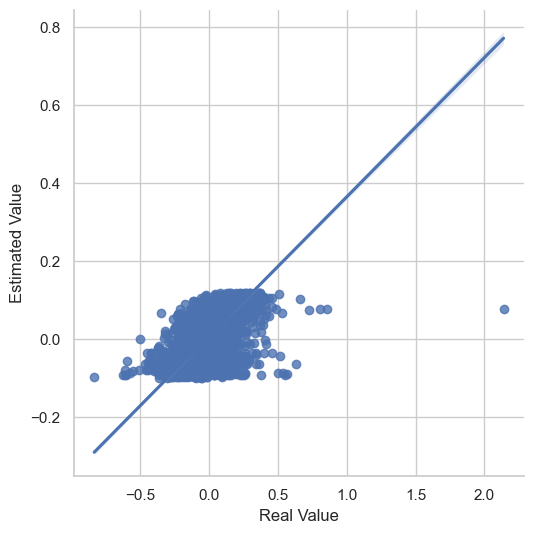

In [55]:
olsh_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": olsh_Y_test_predict})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=olsh_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_Ols_h.pdf")
plt.show()

#### Elastic-Net regression with Huber loss

In [56]:
sec_Elastic = SGDRegressor(loss = "huber", penalty="elasticnet", alpha = 0.5, l1_ratio=0.5)
sec_Elastic.fit(X_train, Y_train)
Y_test_predict_secEl = sec_Elastic.predict(X_test)
r2 = r2_score(Y_test, Y_test_predict_secEl)
print('Elastic-Net Regressor R2 score for testing with alpha = 0.5 and the rho = 0.5 is ' + str(r2))

Elastic-Net Regressor R2 score for testing with alpha = 0.5 and the rho = 0.5 is -0.0008089413772540688


#### Cross-validating Elastic-Net

In [57]:
# Defining the model
Enet_H = SGDRegressor()
# Defining the model  evaluation method
cv_Enet = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid["loss"] = ["huber"]
grid["penalty"] = ["elasticnet"]
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_enet = GridSearchCV(Enet_H, grid, scoring='neg_mean_absolute_error', cv=cv_Enet, n_jobs=-1)
# perform the search
Enet_H_final = search_enet.fit(X_val, Y_val)
# summarize
Config_enet = Enet_H_final.best_params_
print('Config: %s' % Config_enet)
Model_name.append("Enet_H_final")

Config: {'alpha': 0.0001, 'l1_ratio': 0.32, 'loss': 'huber', 'penalty': 'elasticnet'}


In [58]:
# model evaluation for training set
Y_train_predict = Enet_H_final.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('Enet+H with Hubber norm R2 score for training is ' + str(r2))

# Model evaluation for the testing set
enet_Y_test_predict = Enet_H_final.predict(X_test)
r2 = r2_score(Y_test, enet_Y_test_predict)
print('Enet+H with Huber norm R2 score for testing is ' + str(r2))
Model.append("Enet+H")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = Enet_H_final.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('Enet+H with Huber norm R2 score for the top testing is ' + str(r2))
Model.append("Enet+H")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = Enet_H_final.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('Enet+H with Huber norm R2 score for the bottom testing is ' + str(r2))
Model.append("Enet+H")
R2.append(r2)
Position.append("Bottom")

Enet+H with Hubber norm R2 score for training is 0.28609901659037273
Enet+H with Huber norm R2 score for testing is 0.27029887046294665
Enet+H with Huber norm R2 score for the top testing is 0.15741329185942832
Enet+H with Huber norm R2 score for the bottom testing is 0.11880257352908508


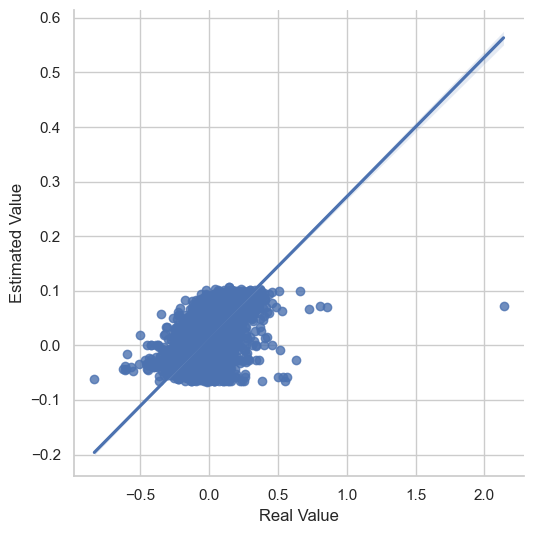

In [59]:
enet_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": enet_Y_test_predict})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=enet_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_enet_h.pdf")
plt.show()

In [60]:
Enet_H_final2 = SGDRegressor(alpha= Config_enet["alpha"], l1_ratio= Config_enet["l1_ratio"], loss= "huber", penalty = 'elasticnet')
Enet_H_final2.fit(X_train, Y_train)
elast_D = {"Coefficient" : Enet_H_final2.coef_, "Feature": X_train.columns}
new_Coefs = pd.DataFrame(elast_D)
# We are trying to get instead the absolute value of the coefficients since a feature might be negatively correlated from the return 
new_Coefs["Coefficient"] = new_Coefs["Coefficient"].apply(lambda x: abs(x))
#new_Coefs = new_Coefs.sort_values(by=['Coefficient'],ascending = False)
new_Coefs["Model"] = "Enet+H"

Coefs = pd.concat([Coefs, new_Coefs], ignore_index = False)


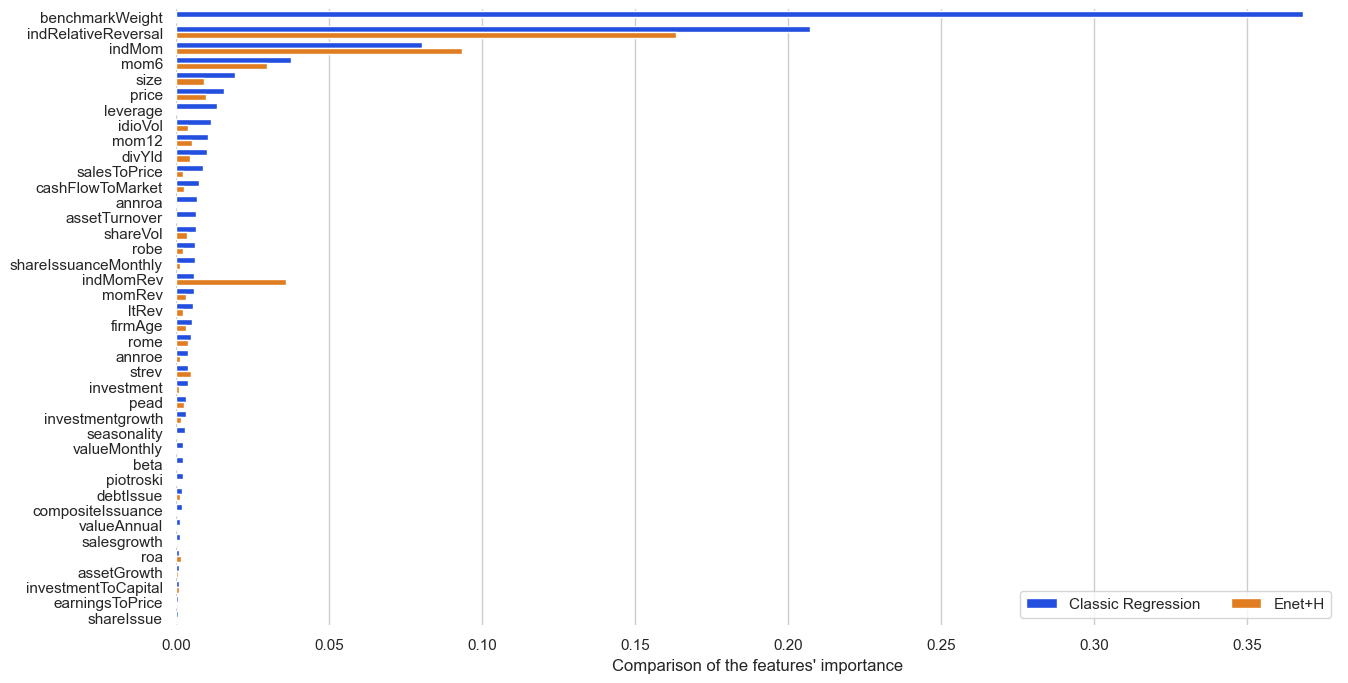

In [61]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Plot the total crashes
sns.set_color_codes("colorblind")
sns.barplot(x="Coefficient", y="Feature", data=Coefs,palette="bright", hue= "Model")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.38), ylabel="",
       xlabel="Comparison of the features' importance")
sns.despine(left=True, bottom=True)
plt.savefig("Img/coef_compar_class_enet.pdf")
plt.show()

### PCR

In [62]:
PCA_model = PCA(n_components=0.95, svd_solver = 'full')
PCA_model.fit(X_train_norm)
print(np.sum(PCA_model.explained_variance_ratio_))
print(np.shape(PCA_model.components_))
PCA_test = PCA_model.transform(X_test_norm)
print(np.shape(PCA_test))
PCA_train = PCA_model.transform(X_train_norm)
PCA_val = PCA_model.transform(X_val_norm)
PCA_top = PCA_model.transform(X_top_norm)
PCA_bottom = PCA_model.transform(X_bottom_norm)

0.9573013389548497
(29, 40)
(23114, 29)


In [63]:
sec_Elastic = SGDRegressor(loss = "huber", penalty="elasticnet", alpha = 0.5, l1_ratio=0.5)
sec_Elastic.fit(PCA_train, Y_train)
Y_test_predict_secEl = sec_Elastic.predict(PCA_test)
r2 = r2_score(Y_test, Y_test_predict_secEl)
print('Elastic-Net Regressor R2 score for testing with alpha = 0.5 and the rho = 0.5 is ' + str(r2))

Elastic-Net Regressor R2 score for testing with alpha = 0.5 and the rho = 0.5 is -0.0005590416318785874


In [64]:
# Defining the model
Enet_H = SGDRegressor()
# Defining the model  evaluation method
cv_Enet = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid["loss"] = ["huber"]
grid["penalty"] = ["elasticnet"]
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_enet = GridSearchCV(Enet_H, grid, scoring='neg_mean_absolute_error', cv=cv_Enet, n_jobs=-1)
# perform the search
Enet_H_final_pca = search_enet.fit(PCA_val, Y_val)
# summarize
Config_pca = Enet_H_final_pca.best_params_
print('Config: %s' % Enet_H_final_pca.best_params_)
Model_name.append("Enet_H_final_pca")
Model_name.append("PCA_model")

Config: {'alpha': 0.001, 'l1_ratio': 0.59, 'loss': 'huber', 'penalty': 'elasticnet'}


In [65]:
# model evaluation for training set
Y_train_predict = Enet_H_final_pca.predict(PCA_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('PCA and Enet+H with Hubber norm R2 score for training is ' + str(r2))

# Model evaluation for the testing set
pca_Y_test_predict = Enet_H_final_pca.predict(PCA_test)
r2 = r2_score(Y_test, pca_Y_test_predict)
print('PCA and Enet+H with Huber norm R2 score for testing is ' + str(r2))
Model.append("PCA")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = Enet_H_final_pca.predict(PCA_top)
r2 = r2_score(Y_top, Y_top_predict)
print('PCA and Enet+H with Huber norm R2 score for the top testing is ' + str(r2))
Model.append("PCA")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = Enet_H_final_pca.predict(PCA_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('PCA and Enet+H with Huber norm R2 score for the bottom testing is ' + str(r2))
Model.append("PCA")
R2.append(r2)
Position.append("Bottom")

PCA and Enet+H with Hubber norm R2 score for training is 0.28243350645460463
PCA and Enet+H with Huber norm R2 score for testing is 0.26520985515917717
PCA and Enet+H with Huber norm R2 score for the top testing is 0.14972261957187194
PCA and Enet+H with Huber norm R2 score for the bottom testing is 0.09112065690112658


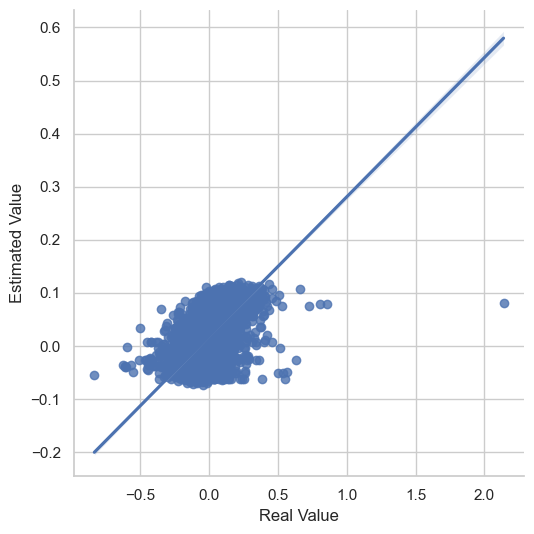

In [66]:
pca_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": pca_Y_test_predict})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=pca_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_pca.pdf")
plt.show()

### PLS

In [67]:
PLS_model = PLSRegression(n_components=2)
PLS_model.fit(X_train, Y_train)
Y_pred = PLS_model.predict(X_test)

In [68]:
scor = r2_score(Y_test, Y_pred)
print("The PLS R2 score on our testing data without knowing the optimum parameters is " + str(scor))

The PLS R2 score on our testing data without knowing the optimum parameters is 0.2517292017933753


In [69]:
# define model
PLS_model = PLSRegression()
# define model evaluation method
cv_pls = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['n_components'] = np.arange(1,20, dtype=int)
# define search
search = GridSearchCV(PLS_model, grid, scoring='neg_mean_absolute_error', cv=cv_pls, n_jobs=-1)
# perform the search
PLS_final_model = search.fit(X_val, Y_val)
Config_pls = PLS_final_model.best_params_
# summarize
print('Config: %s' % PLS_final_model.best_params_)
Model_name.append("PLS_final_model")

Config: {'n_components': 17}


In [70]:
# model evaluation for training set
Y_train_predict = PLS_final_model.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('PLS R2 score for training is ' + str(r2))

# Model evaluation for the testing set
pls_Y_test_predict = PLS_final_model.predict(X_test)
r2 = r2_score(Y_test, Y_test_predict)
print('PLS R2 score for testing is ' + str(r2))
Model.append("PLS")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = PLS_final_model.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('PLS R2 score for the top testing is ' + str(r2))
Model.append("PLS")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = PLS_final_model.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('PLS R2 score for the bottom testing is ' + str(r2))
Model.append("PLS")
R2.append(r2)
Position.append("Bottom")

PLS R2 score for training is 0.3075459211039262
PLS R2 score for testing is 0.2611197887875101
PLS R2 score for the top testing is 0.15674388497095681
PLS R2 score for the bottom testing is 0.12825061328525977


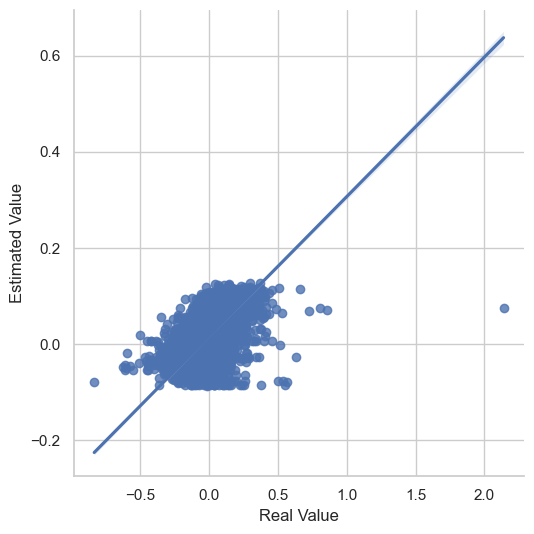

In [71]:
pls_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": pls_Y_test_predict[:,0]})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=pls_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_pls.pdf")
plt.show()

### Neural Networks

### Neural Networks with 3 layers

In [72]:
NN3 = Sequential()

# première couche cachée avec 32 neurones et une fonction d'activation ReLU
NN3.add(Dense(41, activation='relu', input_dim=40))

# deuxième couche cachée avec 16 neurones et une fonction d'activation ReLU
NN3.add(Dense(16, activation='relu'))

# Troisième couche cachée avec 8 neurones et une fonction d'activation ReLU
NN3.add(Dense(8, activation='relu'))

# couche de sortie avec 1 neurone et une fonction d'activation linéaire
NN3.add(Dense(1, activation='linear'))

# compilation du modèle avec l'optimiseur Adam et la fonction de perte MSE
NN3.compile(optimizer='adam', loss='mse')
NN3.fit(x=X_train, y=Y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_val, Y_val))
Model_name.append("NN3")

Epoch 1/30
2659/2659 [==============================] - 7s 2ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 2/30
2659/2659 [==============================] - 5s 2ms/step - loss: 0.0059 - val_loss: 0.0024
Epoch 3/30
2659/2659 [==============================] - 5s 2ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 4/30
2659/2659 [==============================] - 5s 2ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 5/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 6/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 7/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0053 - val_loss: 0.0022
Epoch 8/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 9/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 10/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.005

In [73]:
# model evaluation for training set
Y_train_predict = NN3.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('NN3 R2 score for training is ' + str(r2))

# Model evaluation for the testing set
nn3_Y_test_predict = NN3.predict(X_test)
r2 = r2_score(Y_test, nn3_Y_test_predict)
print('NN3 R2 score for testing is ' + str(r2))
Model.append("NN3")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = NN3.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('NN3 R2 score for the top testing is ' + str(r2))
Model.append("NN3")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = NN3.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('NN3 R2 score for the bottom testing is ' + str(r2))
Model.append("NN3")
R2.append(r2)
Position.append("Bottom")

1247/1247 [==============================] - 3s 2ms/step
NN3 R2 score for training is 0.5615638148487058
723/723 [==============================] - 3s 4ms/step
NN3 R2 score for testing is 0.22092590209311813
32/32 [==============================] - 0s 3ms/step
NN3 R2 score for the top testing is -0.19838902539138958
32/32 [==============================] - 0s 2ms/step
NN3 R2 score for the bottom testing is 0.15255584301257807


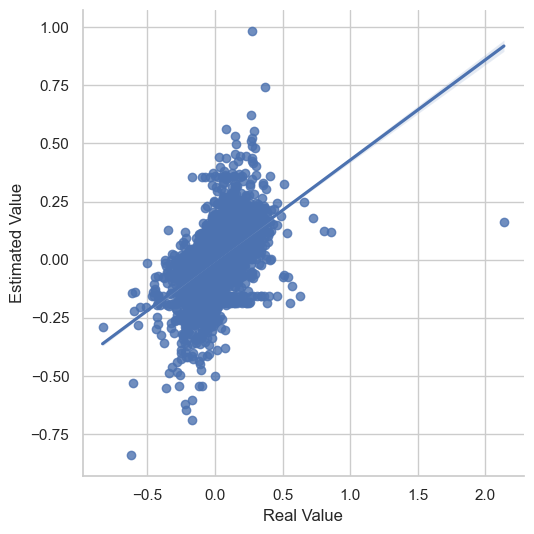

In [74]:
nn3_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": nn3_Y_test_predict[:, 0]})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=nn3_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_nn3.pdf")
plt.show()

### Neural Networks with 4 layers

In [75]:
NN4 = Sequential()

# Première couche cachée avec 32 neurones et une fonction d'activation ReLU
NN4.add(Dense(32, activation='relu', input_dim=40))

# Deuxième couche cachée avec 16 neurones et une fonction d'activation ReLU
NN4.add(Dense(16, activation='relu'))

# Troisième couche cachée avec 8 neurones et une fonction d'activation ReLU
NN4.add(Dense(8, activation='relu'))

# Quatrième couche cachée avec 4 neurones et une fonction d'activation ReLU
NN4.add(Dense(4, activation='relu'))

# couche de sortie avec 1 neurone et une fonction d'activation linéaire
NN4.add(Dense(1, activation='linear'))

# compilation du modèle avec l'optimiseur Adam et la fonction de perte MSE
NN4.compile(optimizer='adam', loss='mse')
NN4.fit(x=X_train, y=Y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_val, Y_val))
Model_name.append("NN4")

Epoch 1/30
2659/2659 [==============================] - 10s 3ms/step - loss: 0.0068 - val_loss: 0.0024
Epoch 2/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0059 - val_loss: 0.0019
Epoch 3/30
2659/2659 [==============================] - 7s 2ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 4/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 5/30
2659/2659 [==============================] - 10s 4ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 6/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 7/30
2659/2659 [==============================] - 8s 3ms/step - loss: 0.0054 - val_loss: 0.0019
Epoch 8/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 9/30
2659/2659 [==============================] - 7s 3ms/step - loss: 0.0053 - val_loss: 0.0023
Epoch 10/30
2659/2659 [==============================] - 6s 2ms/step - loss: 0.0

In [76]:
# model evaluation for training set
Y_train_predict = NN4.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('NN4 R2 score for training is ' + str(r2))

# Model evaluation for the testing set
nn4_Y_test_predict = NN4.predict(X_test)
r2 = r2_score(Y_test, Y_test_predict)
print('NN4 R2 score for testing is ' + str(r2))
Model.append("NN4")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = NN4.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('NN4 R2 score for the top testing is ' + str(r2))
Model.append("NN4")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = NN4.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('NN4 R2 score for the bottom testing is ' + str(r2))
Model.append("NN4")
R2.append(r2)
Position.append("Bottom")

1247/1247 [==============================] - 2s 1ms/step
NN4 R2 score for training is 0.5446396782691003
723/723 [==============================] - 1s 1ms/step
NN4 R2 score for testing is 0.2611197887875101
32/32 [==============================] - 0s 1ms/step
NN4 R2 score for the top testing is -0.20319676332311354
32/32 [==============================] - 0s 2ms/step
NN4 R2 score for the bottom testing is 0.1495712727501769


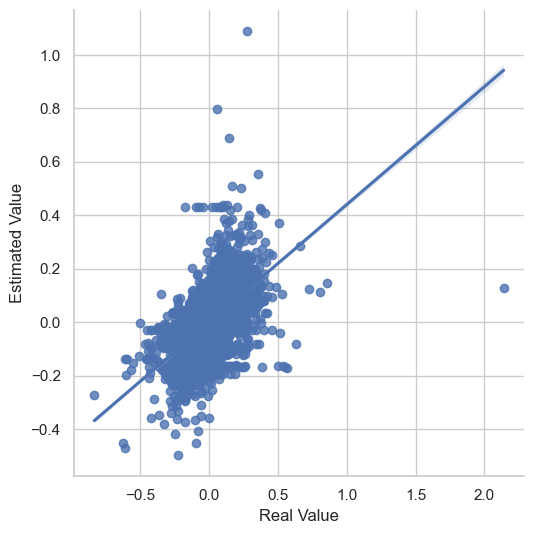

In [77]:
nn4_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": nn4_Y_test_predict[:,0]})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=nn4_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_nn4.pdf")
plt.show()

### Neural Networks with 5 layers

In [78]:
NN5 = Sequential()

# Première couche cachée avec 64 neurones et une fonction d'activation ReLU
NN5.add(Dense(40, activation='relu', input_dim=40))

# Deuxième couche cachée avec 16 neurones et une fonction d'activation ReLU
NN5.add(Dense(16, activation='relu'))

# Troisième couche cachée avec 8 neurones et une fonction d'activation ReLU
NN5.add(Dense(8, activation='relu'))

# Quatrième couche cachée avec 4 neurones et une fonction d'activation ReLU
NN5.add(Dense(4, activation='relu'))

# Cinquième couche cachée avec 2 neurones et une fonction d'activation ReLU
NN5.add(Dense(2, activation='relu'))

# couche de sortie avec 1 neurone et une fonction d'activation linéaire
NN5.add(Dense(1, activation='linear'))

# compilation du modèle avec l'optimiseur Adam et la fonction de perte MSE
NN5.compile(optimizer='adam', loss='mse')
NN5.fit(x=X_train, y=Y_train, batch_size=15, epochs=30, shuffle=True, validation_data= (X_val, Y_val))
Model_name.append("NN5")

Epoch 1/30
2659/2659 [==============================] - 11s 3ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 2/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 3/30
2659/2659 [==============================] - 8s 3ms/step - loss: 0.0057 - val_loss: 0.0021
Epoch 4/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 5/30
2659/2659 [==============================] - 7s 3ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 6/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 7/30
2659/2659 [==============================] - 17s 6ms/step - loss: 0.0053 - val_loss: 0.0020
Epoch 8/30
2659/2659 [==============================] - 11s 4ms/step - loss: 0.0053 - val_loss: 0.0022
Epoch 9/30
2659/2659 [==============================] - 9s 3ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 10/30
2659/2659 [==============================] - 8s 3ms/step - loss: 0.

In [79]:
# model evaluation for training set
Y_train_predict = NN5.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('NN5 R2 score for training is ' + str(r2))

# Model evaluation for the testing set
nn5_Y_test_predict = NN5.predict(X_test)
r2 = r2_score(Y_test, nn5_Y_test_predict)
print('NN5 R2 score for testing is ' + str(r2))
Model.append("NN5")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = NN5.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('NN5 R2 score for the top testing is ' + str(r2))
Model.append("NN5")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = NN5.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('NN5 R2 score for the bottom testing is ' + str(r2))
Model.append("NN5")
R2.append(r2)
Position.append("Bottom")

1247/1247 [==============================] - 2s 2ms/step
NN5 R2 score for training is 0.5573741921644857
723/723 [==============================] - 1s 1ms/step
NN5 R2 score for testing is 0.26696597954001366
32/32 [==============================] - 0s 2ms/step
NN5 R2 score for the top testing is -0.16253885608407814
32/32 [==============================] - 0s 2ms/step
NN5 R2 score for the bottom testing is 0.14924751828308835


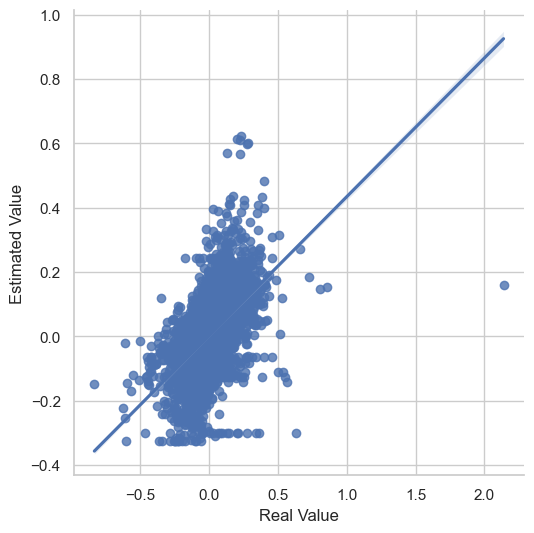

In [80]:
nn5_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": nn5_Y_test_predict[:, 0]})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=nn5_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_nn5.pdf")
plt.show()

### Random Forest

##### Getting the best parameters of our radom forest

In [81]:
''' # Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 15, 25, 35, 40]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train) '''

" # Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10, 20, 40, 50]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [5, 10, 15, 25, 35, 40]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,}\nrf = RandomForestRegressor()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator =

In [82]:
# instance of random forest regressor
RF = RandomForestRegressor(n_estimators=500, random_state=42, max_depth = 25, min_samples_leaf=35, max_features="sqrt",min_samples_split = 50)

# Fit the random forest regressor to the training data
RF.fit(X_train, Y_train)
Model_name.append("RF")

In [83]:
# model evaluation for training set
Y_train_predict = RF.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('RF R2 score for training is ' + str(r2))

# Model evaluation for the testing set
rf_Y_test_predict = RF.predict(X_test)
r2 = r2_score(Y_test, rf_Y_test_predict)
print('RF R2 score for testing is ' + str(r2))
Model.append("RF")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = RF.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('RF R2 score for the top testing is ' + str(r2))
Model.append("RF")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = RF.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('RF R2 score for the bottom testing is ' + str(r2))
Model.append("RF")
R2.append(r2)
Position.append("Bottom")

RF R2 score for training is 0.511095116697727
RF R2 score for testing is 0.329404070610426
RF R2 score for the top testing is 0.08851473234321006
RF R2 score for the bottom testing is 0.19030227331216576


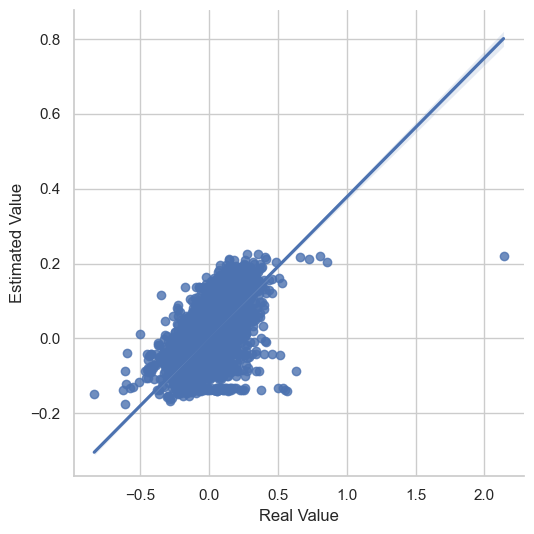

In [84]:
rf_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": rf_Y_test_predict})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=rf_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_rf.pdf")
plt.show()

### Gradient Boosting Regression


##### Getting the best parameters of our Gradient Bossting Regression model

In [85]:
''' # Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 15, 25, 35, 40]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
gbr = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train) '''

" # Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10, 20, 40, 50]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [5, 10, 15, 25, 35, 40]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,}\ngbr = GradientBoostingRegressor()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estima

In [86]:
# instance of GradientBoostingRegressor and fit the model
GBR = GradientBoostingRegressor(n_estimators=15, random_state=42, max_depth = 90, min_samples_leaf=20, max_features="sqrt",min_samples_split = 10)
GBR.fit(X_train, Y_train)
Model_name.append("GBR")

In [87]:
# model evaluation for training set
Y_train_predict = GBR.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)
print ('GBR R2 score for training is ' + str(r2))

# Model evaluation for the testing set
gbr_Y_test_predict = GBR.predict(X_test)
r2 = r2_score(Y_test, gbr_Y_test_predict)
print('GBR R2 score for testing is ' + str(r2))
Model.append("GBR")
R2.append(r2)
Position.append("All")

# Model evaluation for the top 1000 market value stocks of the testing set
Y_top_predict = GBR.predict(X_top)
r2 = r2_score(Y_top, Y_top_predict)
print('GBR R2 score for the top testing is ' + str(r2))
Model.append("GBR")
R2.append(r2)
Position.append("Top")

# Model evaluation for the bottom 1000 market value stocks of the testing set
Y_bottom_predict = GBR.predict(X_bottom)
r2 = r2_score(Y_bottom, Y_bottom_predict)
print('GBR R2 score for the bottom testing is ' + str(r2))
Model.append("GBR")
R2.append(r2)
Position.append("Bottom")

GBR R2 score for training is 0.6709204433641065
GBR R2 score for testing is 0.3066131175610207
GBR R2 score for the top testing is 0.11236188704748618
GBR R2 score for the bottom testing is 0.14250735966363004


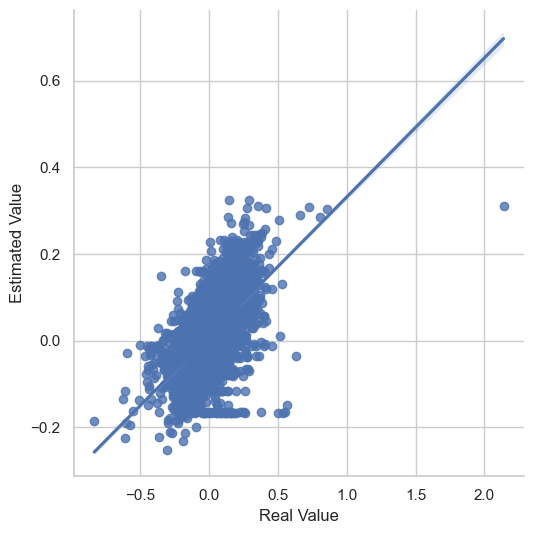

In [88]:
gbr_compare = pd.DataFrame({"Real Value" : Y_test.to_numpy(), "Estimated Value": gbr_Y_test_predict})
# Plot sepal width as a function of sepal_length across days
sns.lmplot(data=gbr_compare,x="Real Value", y="Estimated Value",height=5.5, robust=True)
plt.savefig("Img/scater_gbr.pdf")
plt.show()

### Comparing the overall results of all the methods

In [89]:
Results = dict()
Results["Model"] = Model
Results["R2"] = R2
Results["Position"] = Position
Results = pd.DataFrame(Results)
Results["Type"] = "Without Expanding Window"

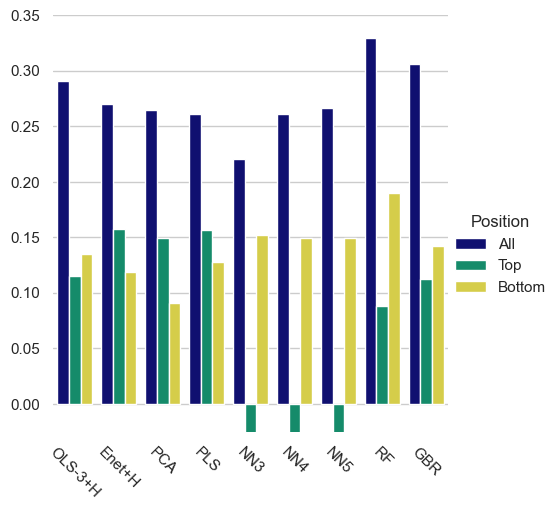

In [90]:
# Plot the total crashes
sns.set_color_codes("colorblind")
graph = sns.catplot(x="Model", y="R2", kind="bar", data=Results,palette=["navy", "g", "y"], hue= "Position")
graph.set_xticklabels(rotation=-45)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
graph.set(ylim=(-0.025, 0.35), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)
plt.savefig("Img/Compared_R2_models.pdf")
plt.show()

## Expanding windows

In [91]:
new_Model = []
Moy = []
new_Position = []

In [92]:
def expanding_window(model, name):

    Y_R2_all = []
    Y_R2_top = []
    Y_R2_bottom = []
    Year = []

    yearXtrain = newGlob[(newGlob["Date"] <= to_datetime("2012-12-31"))]
    yearYtrain = yearXtrain["Returns"]

    yearXtrain = yearXtrain.drop(columns= ["Date", "Returns"])

    k = 156

    #predictions = dict()

    while k < dates.shape[0]: #

        prev_Xtrain = yearXtrain
        prev_Ytrain = yearYtrain
        
        if name in ["NN4", "NN3", "NN5"]: 
            model.fit(prev_Xtrain, prev_Ytrain, batch_size=15, epochs=30, shuffle=True)
        else: 
            model.fit(prev_Xtrain, prev_Ytrain)
        
        
        # Adding the year whose returns were just predicted to the training data. 
        if k+12 < dates.shape[0]: 
            yearX = newGlob[(newGlob["Date"] > to_datetime(dates[k])) & (newGlob["Date"] <= to_datetime(dates[k+12]))]
            year_sortedX = newGlob[(newGlob["Date"] > to_datetime(dates[k])) & (newGlob["Date"] <= to_datetime(dates[k+12]))]
        else: 
            yearX = newGlob[(newGlob["Date"] > to_datetime(dates[k]))]
            year_sortedX = newGlob[(newGlob["Date"] > to_datetime(dates[k]))]

        newY = yearX["Returns"]
        newX = yearX.drop(columns= ["Date", "Returns"])

        X_sorted_top = year_sortedX.sort_values(by=["size"], ascending = False)
        year_topX = X_sorted_top.iloc[0:100, :]

        X_sorted_bottom = year_sortedX.sort_values(by=["size"], ascending = True)
        year_bottomX = X_sorted_bottom.iloc[0:100, :]

        new_topY = year_topX["Returns"]
        new_topX = year_topX.drop(columns = ["Date", "Returns"])

        new_bottomY = year_bottomX["Returns"]
        new_bottomX = year_bottomX.drop(columns = ["Date", "Returns"])
        
        
        year = dates[k+1][:4]
        year_predict_all = model.predict(newX)
        year_predict_top = model.predict(new_topX)
        year_predict_bottom = model.predict(new_bottomX)

        
        #Getting the complexity of the model in terms of number of parameters
        #last_coef = abs(np.array(model.coef_))
        #relevant = np.where(last_coef > 0)
        #complexity = len(relevant[0])

        #Complexity.append(complexity)
        Year.append(year)
        Y_R2_all.append(r2_score(newY, year_predict_all))
        Y_R2_top.append(r2_score(new_topY, year_predict_top))
        Y_R2_bottom.append(r2_score(new_bottomY, year_predict_bottom))
            
        #predictions[dates[k+1]] = [newY, year_predict_all,r2_score(newY,year_predict_all)]
        
        yearXtrain = pd.concat([prev_Xtrain, newX], ignore_index=False)
        yearYtrain = pd.concat([prev_Ytrain, newY], ignore_index=False)

        k += 12
    
    R_complex = dict()
    R_complex["Year"] = Year
    R_complex["Mean R2_All"] = Y_R2_all
    R_complex["Mean R2_Top"] = Y_R2_top
    R_complex["Mean R2_Bottom"] = Y_R2_bottom
    R_complex = pd.DataFrame(R_complex)


    plt.figure(figsize=(15,6))
    sns.set_theme(style="darkgrid")
    #sns.lineplot(x="Year", y="R2_All",data=R_complex) #.set_title("Evolution of the out-of-sample R2 score")
    #sns.lineplot(x="Year", y="R2_Top",data=R_complex)
    #sns.lineplot(x="Year", y="R2_Bottom",data=R_complex)
    sns.lineplot(x='Year', y='value', hue='variable', 
                data=pd.melt(R_complex, ['Year']),
                palette=['red', 'blue', 'purple'])
    plt.savefig("Img/expand_wind_"+str(name)+".pdf")
    plt.show()
    new_Model.append(name)
    Moy.append(np.mean(Y_R2_all))
    new_Position.append("All")

    new_Model.append(name)
    Moy.append(np.mean(Y_R2_top))
    new_Position.append("Top")

    new_Model.append(name)
    Moy.append(np.mean(Y_R2_bottom))
    new_Position.append("Bottom")

    return name + " - Done"


    

### Expanding window with Elastic-Net

In [93]:
Enet_H_final = SGDRegressor(alpha= 0.001, l1_ratio = 0.98, loss = 'huber', penalty = 'elasticnet')

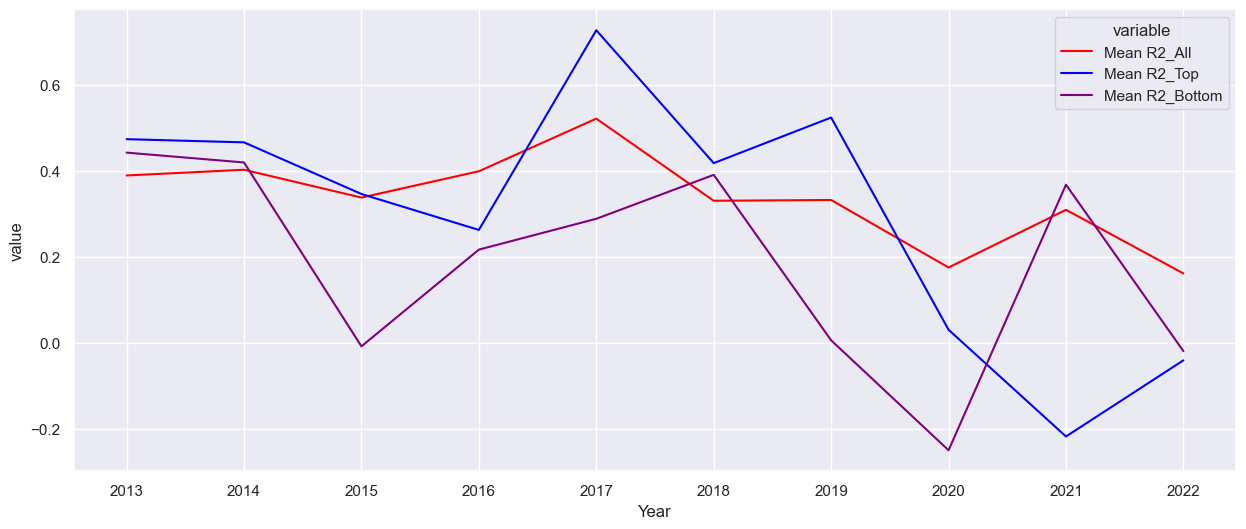

'Enet+H - Done'

In [94]:
expanding_window(Enet_H_final, "Enet+H")

### Expanding window with Random Forest

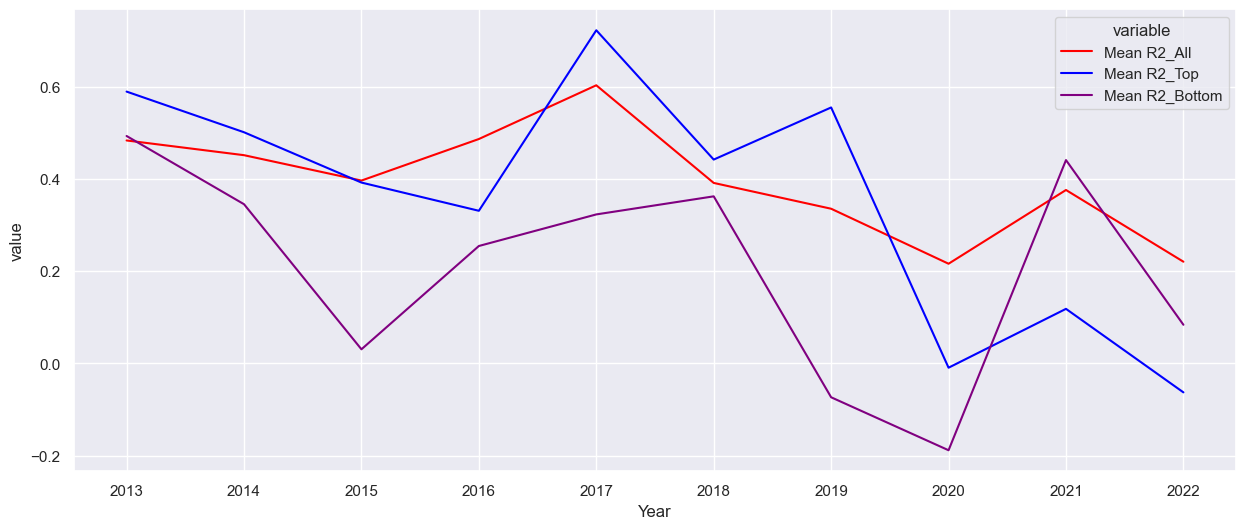

'RF - Done'

In [95]:
expanding_window(RF, "RF")

### Expanding window with Gradient Boosting Regression

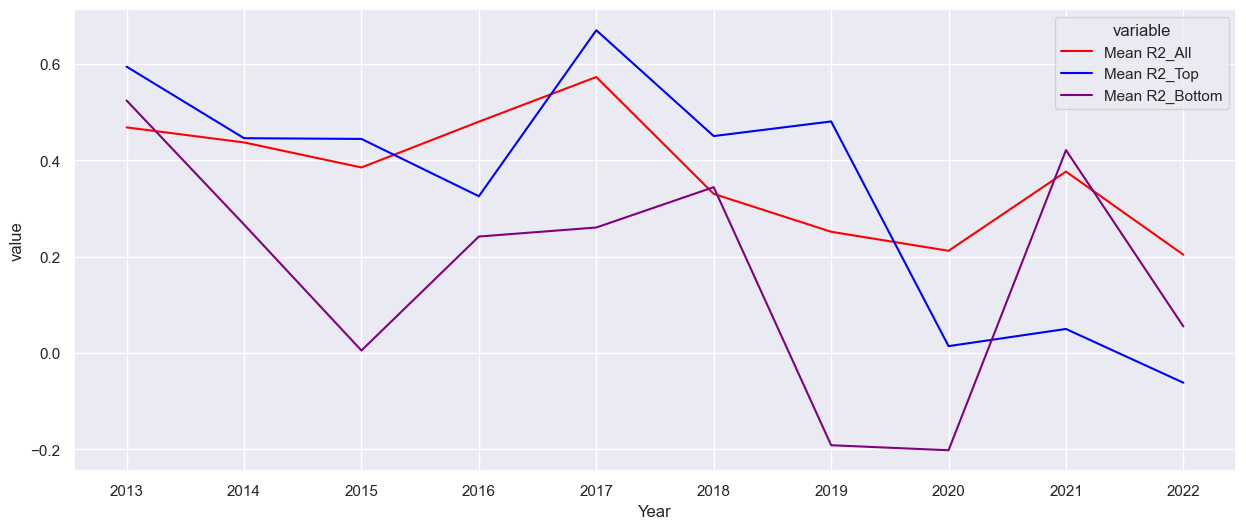

'GBR - Done'

In [96]:
expanding_window(GBR, "GBR")

### Expanding window with NN3

Epoch 1/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 2/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 3/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 4/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 5/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 6/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 7/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 8/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 9/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 10/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 11/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 12/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
E

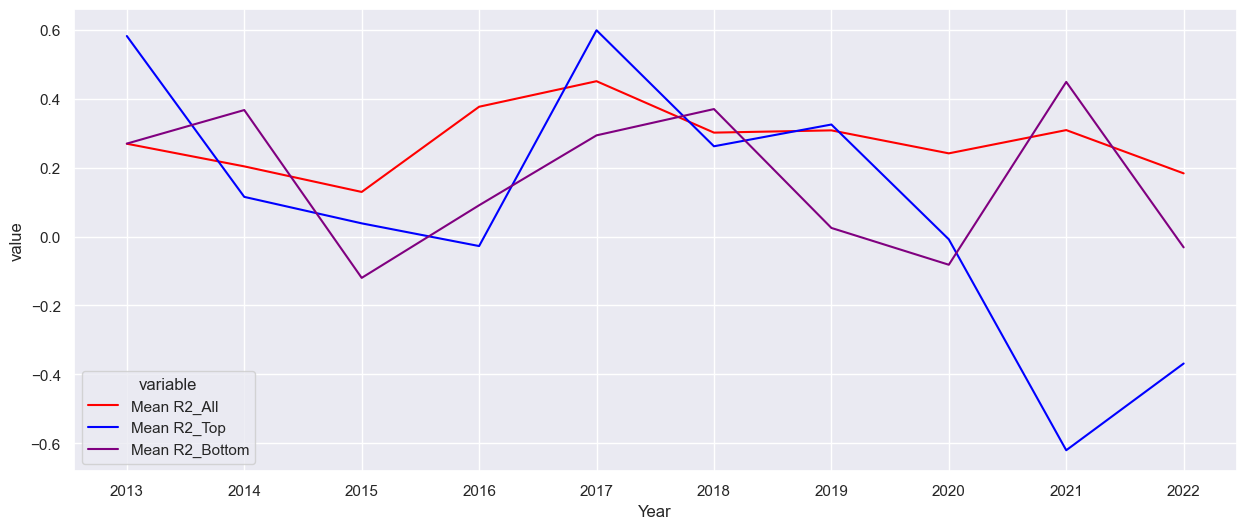

'NN3 - Done'

In [97]:
expanding_window(NN3, "NN3")


### Expanding window with NN4

Epoch 1/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0047
Epoch 2/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0047
Epoch 3/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 4/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 5/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 6/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 7/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 8/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 9/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 10/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 11/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 12/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
E

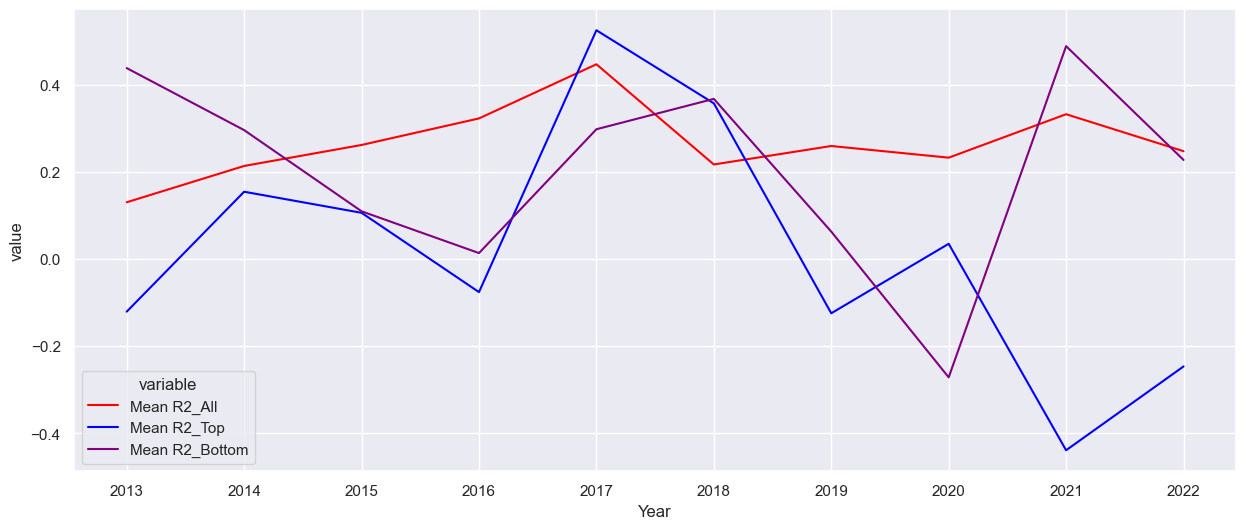

'NN4 - Done'

In [98]:
expanding_window(NN4, "NN4")

### Expanding window with NN5

Epoch 1/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 2/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 3/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0045
Epoch 4/30
2659/2659 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 5/30
2659/2659 [==============================] - 4s 2ms/step - loss: 0.0046
Epoch 6/30
2659/2659 [==============================] - 5s 2ms/step - loss: 0.0045
Epoch 7/30
2659/2659 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 8/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 9/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 10/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 11/30
2659/2659 [==============================] - 3s 1ms/step - loss: 0.0044
Epoch 12/30
2659/2659 [==============================] - 4s 1ms/step - loss: 0.0044
E

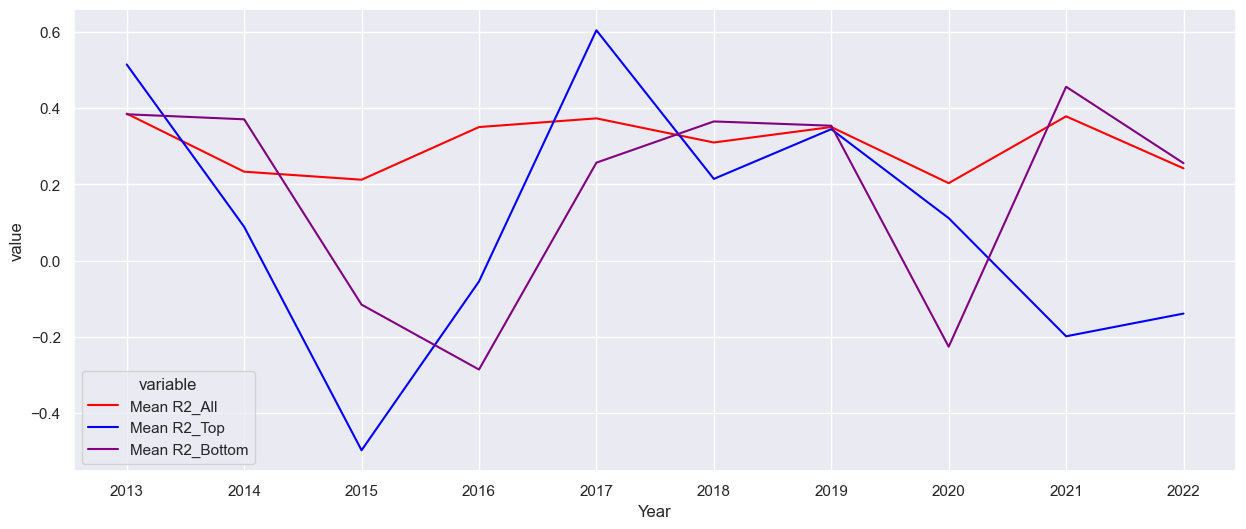

'NN5 - Done'

In [99]:
expanding_window(NN5, "NN5")

### Expanding window with PLS

In [100]:
expanding_window(PLS_final_model, "PLS")

### Expanding window with OLS-3+H

In [ ]:
expanding_window(OLS_H, "OLS-3+H")


: 

### Expanding window with PCR

In [ ]:
#Complexity = []
Y_R2_all = []
Y_R2_top = []
Y_R2_bottom = []
Year = []

yearXtrain = newGlob[(newGlob["Date"] <= to_datetime("2012-12-31"))]
yearYtrain = yearXtrain["Returns"]

yearXtrain = yearXtrain.drop(columns= ["Date", "Returns"])

k = 156

#predictions = dict()


while k < dates.shape[0]: #

    prev_Xtrain = yearXtrain
    prev_Ytrain = yearYtrain
    
    # Defining the models
    Enet_H = SGDRegressor(alpha= Config_pca["alpha"], l1_ratio = Config_pca["l1_ratio"], loss = 'huber', penalty = 'elasticnet')
    Enet_H_final = Enet_H.fit(PCA_model.transform(prev_Xtrain), prev_Ytrain)
    
    
    
    # Adding the year whose returns were just predicted to the training data. 
    if k+12 < dates.shape[0]: 
        yearX = newGlob[(newGlob["Date"] > to_datetime(dates[k])) & (newGlob["Date"] <= to_datetime(dates[k+12]))]
        year_sortedX = newGlob[(newGlob["Date"] > to_datetime(dates[k])) & (newGlob["Date"] <= to_datetime(dates[k+12]))]
    else: 
        yearX = newGlob[(newGlob["Date"] > to_datetime(dates[k]))]
        year_sortedX = newGlob[(newGlob["Date"] > to_datetime(dates[k]))]

    newY = yearX["Returns"]
    newX = yearX.drop(columns= ["Date", "Returns"])

    X_sorted_top = year_sortedX.sort_values(by=["size"], ascending = False)
    year_topX = X_sorted_top.iloc[0:100, :]

    X_sorted_bottom = year_sortedX.sort_values(by=["size"], ascending = True)
    year_bottomX = X_sorted_bottom.iloc[0:100, :]

    new_topY = year_topX["Returns"]
    new_topX = year_topX.drop(columns = ["Date", "Returns"])

    new_bottomY = year_bottomX["Returns"]
    new_bottomX = year_bottomX.drop(columns = ["Date", "Returns"])
    
    
    year = dates[k+1][:4]
    year_predict_all = Enet_H_final.predict(PCA_model.transform(newX))
    year_predict_top = Enet_H_final.predict(PCA_model.transform(new_topX))
    year_predict_bottom = Enet_H_final.predict(PCA_model.transform(new_bottomX))

    
    #Getting the complexity of the model in terms of number of parameters
    #last_coef = abs(np.array(Enet_H_final.coef_))
    #relevant = np.where(last_coef > 0)
    #complexity = len(relevant[0])

    #Complexity.append(complexity)
    Year.append(year)
    Y_R2_all.append(r2_score(newY, year_predict_all))
    Y_R2_top.append(r2_score(new_topY, year_predict_top))
    Y_R2_bottom.append(r2_score(new_bottomY, year_predict_bottom))
    
        
    #predictions[dates[k+1]] = [newY, year_predict_all,r2_score(newY,year_predict_all)]
    
    yearXtrain = pd.concat([prev_Xtrain, newX], ignore_index=False)
    yearYtrain = pd.concat([prev_Ytrain, newY], ignore_index=False)

    k += 12

: 

In [ ]:
R_complex = dict()
R_complex["Year"] = Year
R_complex["Mean R2_All"] = Y_R2_all
R_complex["Mean R2_Top"] = Y_R2_top
R_complex["Mean R2_Bottom"] = Y_R2_bottom
R_complex = pd.DataFrame(R_complex)

: 

In [ ]:
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
#sns.lineplot(x="Year", y="R2_All",data=R_complex) #.set_title("Evolution of the out-of-sample R2 score")
#sns.lineplot(x="Year", y="R2_Top",data=R_complex)
#sns.lineplot(x="Year", y="R2_Bottom",data=R_complex)
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(R_complex, ['Year']),
             palette=['red', 'blue', 'purple'])

plt.savefig("Img/expand_wind_PCR.pdf")

plt.show()

: 

In [ ]:
new_Model.append("PCA")
Moy.append(np.mean(Y_R2_all))
new_Position.append("All")

new_Model.append("PCA")
Moy.append(np.mean(Y_R2_top))
new_Position.append("Top")

new_Model.append("PCA")
Moy.append(np.mean(Y_R2_bottom))
new_Position.append("Bottom")

: 

In [ ]:
new_results = dict()
new_results["Model"] = new_Model
new_results["R2"] = Moy
new_results["Position"] = new_Position
new_results = pd.DataFrame(new_results)
new_results["Type"] = "With Expanding Window"

: 

In [ ]:
overall_all_results = pd.concat([Results[Results["Position"] == "All"], new_results[new_results["Position"] == "All"]], ignore_index=False)

: 

In [ ]:
# Plot the total crashes
sns.set_color_codes("colorblind")
graph = sns.catplot(x="Model", y="R2", kind="bar", data=overall_all_results,palette=["navy", "g"], hue= "Type")
graph.set_xticklabels(rotation=-45)
#graph.fig.suptitle('"Monthly Out-of-sample stock-level prediction performance (percentage R2)"')
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
#graph.set(ylim=(-0.3, 0.5), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)
plt.savefig("Img/expandvswithoutexpand_all.pdf")
plt.show()

: 

In [ ]:
overall_top_results = pd.concat([Results[Results["Position"] == "Top"], new_results[new_results["Position"] == "Top"]], ignore_index=False)

: 

In [ ]:
# Plot the total crashes

sns.set_color_codes("colorblind")
graph = sns.catplot(x="Model", y="R2", kind="bar", data=overall_top_results,palette=["navy", "g"], hue= "Type")
graph.set_xticklabels(rotation=-45)
#graph.fig.suptitle('"Monthly Out-of-sample stock-level prediction performance (percentage R2)"')
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
#graph.set(ylim=(-0.3, 0.5), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)
plt.savefig("Img/expandvswithoutexpand_top.pdf")
plt.show()

: 

In [ ]:
overall_bottom_results = pd.concat([Results[Results["Position"] == "Bottom"], new_results[new_results["Position"] == "Bottom"]], ignore_index=False)

: 

In [ ]:
# Plot the total crashes
sns.set_color_codes("colorblind")
graph = sns.catplot(x="Model", y="R2", kind="bar", data=overall_bottom_results,palette=["navy", "g"], hue= "Type")
graph.set_xticklabels(rotation=-45)
#graph.fig.suptitle('"Monthly Out-of-sample stock-level prediction performance (percentage R2)"')
# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
#graph.set(ylim=(-0.3, 0.5), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)
plt.savefig("Img/expandvswithoutexpand_bottom.pdf")

plt.show()

: 